### Time Series Analysis on Corona Virus Data


https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [7]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import pickle
import os.path
from datetime import datetime
import pyarrow
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from pylab import rcParams
warnings.filterwarnings("ignore")
%matplotlib inline

# Dynamic parameters
data_dir  = '../data/' + str(datetime.date(datetime.now()))
agg_file  = 'agg_data_{}.parquet.gzip'.format(datetime.date(datetime.now()))
trend_file  = 'trend_{}.csv'.format(datetime.date(datetime.now()))

# import data
agg_df = pd.read_parquet(os.path.join(data_dir, agg_file))
daily_df = pd.read_csv(os.path.join(data_dir, trend_file), index_col=[0])

# Convert types
for col in ['confirmed', 'deaths', 'recovered']:
    agg_df[col] = agg_df[col].replace('', 0).astype(int)

agg_df['date'] = agg_df['date'].astype('datetime64[ns]')
daily_df['date'] = daily_df['date'].astype('datetime64[ns]')

#set ggplot style
plt.style.use('ggplot')

### Clean data


In [ ]:
# Agg data
# confirmed_agg = agg_df.copy()
# confirmed_agg.drop(['country','deaths', 'last update (utc)', 'province', 'recovered'], axis=1, inplace=True)

# confirmed_agg = confirmed_agg.set_index('date')

In [ ]:
# Daily Data
# confirmed_daily = daily_df.copy()
# confirmed_daily.drop(['new_deaths', 'new_recoveries'], axis=1, inplace=True)

# confirmed_daily = confirmed_agg.set_index('date')

#### Display range of days

In [8]:
#Calculate range of trend data
def time_range(tmp_df):
    print('...', tmp_df['date'].min().date(), 'to',  tmp_df['date'].max().date())
    print('...', tmp_df['date'].min() - tmp_df['date'].max())
    print('\n')

print('Calulcating date ranges...\n')
print('time series data:')
time_range(agg_df)

print('trend data:')
time_range(daily_df)

Calulcating date ranges...

time series data:
... 2020-01-22 to 2020-02-03
... -12 days +00:00:00


trend data:
... 2020-01-22 to 2020-02-03
... -12 days +00:00:00




#### Plotting

In [9]:
# Plots
def plot_scatter_2vars(tmp_df, x_col, y_col):
    tmp_df.plot(x=x_col, y=y_col, style='o')  
    plt.title('Scatter plot for correlation of ' + x_col + ' and ' + y_col)  
    plt.xlabel(x_col)  
    plt.ylabel(y_col)  
    plt.show()

def plot_scatter_1var(tmp_df, col):
    
    tmp_df.groupby(['date'])[col].sum().plot(figsize=(10, 6), style='o') 
    plt.title('Regression on accumalitive Sum of Confirmed Cases')  
    plt.xlabel('date')  
    plt.ylabel('confirmed cases')  
    plt.show()


def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [10]:
daily_df.columns

Index(['new_confirmed_cases', 'new_deaths', 'new_recoveries', 'date'], dtype='object')

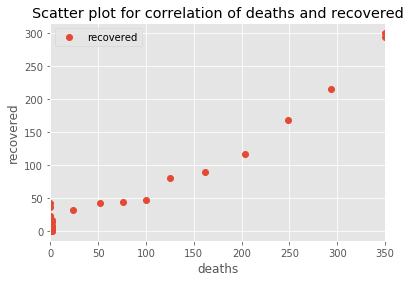

In [24]:
plot_scatter_2vars(agg_df, 'deaths', 'recovered')

## Moving Average

In [4]:
# '''
# Split into training and testing sets
#  - for univariate time series

# '''    
# def split_data(tmp_df, col, split):
    
#     #Training
#     split_time = split
#     time_train = tmp_df.date[:split_time]
#     x_train = tmp_df[col][:split_time]

#     #validation
#     time_valid = tmp_df.date[split_time:]
#     x_valid = tmp_df[col][split_time:]

#     #Plot
#     plt.figure(figsize=(10, 6))
#     plot_series(time_train, x_train)
#     plt.show()

#     plt.figure(figsize=(10, 6))
#     plot_series(time_valid, x_valid)
#     plt.show()
    
#     return time_train, time_valid, x_train, x_valid

# # time_train, time_valid = split_data(agg_df, 'confirmed')


# Create lagged dataset
# values = pd.DataFrame(daily_df.new_confirmed_cases.values)
# dataframe = pd.concat([values.shift(1), values], axis=1)
# dataframe.columns = ['t-1', 't+1']
# print(dataframe.head(10))



# # split into train and test sets
# X = dataframe.values
# train_size = int(len(X) * 0.4) # 2/3 split of data
# train, test = X[1:train_size], X[train_size:]


# train_X, train_y = train[:,0], train[:,1]
# test_X, test_y = test[:,0], test[:,1]


# persistence model
# def model_persistence(x):
# 	return x

# from keras.metrics import mean_squared_error


# # walk-forward validation
# predictions = list()
# for x in test_X:
# 	yhat = model_persistence(x)
# 	predictions.append(yhat)
# test_score = mean_squared_error(test_y, predictions)
# print('Test MSE: %.3f' % test_score)


### plot predictions and expected results
# plt.plot(train_y)
# plt.plot([None for i in train_y] + [x for x in test_y])
# plt.plot([None for i in train_y] + [x for x in predictions])
# plt.show()

# plt.figure(figsize=(10, 6))
# plot_series(time_valid, x_valid, start=0, end=1000)
# plot_series(time_valid, naive_forecast, start=1, end=1000)

# time_train, time_valid, x_train, x_valid = split_data(daily_df, 'new_confirmed_cases', 1)

# naive_forecast = daily_df.new_confirmed_cases[split_time - 1:-1]

# plt.figure(figsize=(10, 6))
# plot_series(time_valid, x_valid)
# plot_series(time_valid, naive_forecast)


# import s
# print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
# print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

# Accumalitive Data


# Daily Data